In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("ESPN_IPL.csv")
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s
0,0,V Kohli (RCB),2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234
1,1,S Dhawan (DC/MI/PBKS/SRH),2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148
2,2,DA Warner (DC/SRH),2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226
3,3,RG Sharma (DC/MI),2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257
4,4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


In [45]:
df = df.drop(["Unnamed: 0"],axis=1)
df


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s
0,V Kohli (RCB),2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234
1,S Dhawan (DC/MI/PBKS/SRH),2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148
2,DA Warner (DC/SRH),2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226
3,RG Sharma (DC/MI),2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257
4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,J Botha (DC/KKR/RR),2009-2015,34,28,8,409,67*,20.45,359,113.92,-,1,-,39,5
146,LR Shukla (DC/KKR),2008-2014,47,34,7,405,48*,15.00,350,115.71,-,-,3,33,15
147,RM Patidar (RCB),2021-2022,12,11,1,404,112*,40.40,280,144.28,1,2,-,30,21
148,MK Lomror (RCB/RR),2018-2023,30,25,4,402,54*,19.14,305,131.80,-,1,1,24,21


In [46]:
# Getting the player details with maximum number of matches played
df.loc[df['Mat'].idxmax()]

Player    MS Dhoni (CSK/RPS)
Span               2008-2023
Mat                      250
Inns                     218
NO                        87
Runs                    5082
HS                       84*
Ave                    38.79
BF                      3739
SR                    135.91
100s                       -
50s                       24
0                          5
4s                       349
6s                       239
Name: 6, dtype: object

In [47]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO         object
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100s       object
50s        object
0          object
4s          int64
6s          int64
dtype: object

In [48]:
df["NO"].where(df["NO"]=="-")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
145    NaN
146    NaN
147    NaN
148    NaN
149    NaN
Name: NO, Length: 150, dtype: object

In [49]:
# Removing special characters
#df.replace(r'[\W]', '', inplace=True, regex=True)

In [50]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s
0,V Kohli (RCB),2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234
1,S Dhawan (DC/MI/PBKS/SRH),2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148
2,DA Warner (DC/SRH),2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226
3,RG Sharma (DC/MI),2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257
4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
5,AB de Villiers (DC/RCB),2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
6,MS Dhoni (CSK/RPS),2008-2023,250,218,87,5082,84*,38.79,3739,135.91,-,24,5,349,239
7,CH Gayle (KKR/KXIP/PBKS/RCB),2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa (CSK/KKR/MI/PWI/RCB/RR),2008-2022,205,197,17,4952,88,27.51,3799,130.35,-,27,8,481,182
9,KD Karthik (DC/GL/KKR/KXIP/MI/RCB),2008-2023,242,221,46,4516,97*,25.80,3403,132.70,-,20,17,439,139


In [51]:
players_Teams = []
playername = []
teamname = []
for i in range(0,len(df["Player"])):

    player = df["Player"][i]

    x = df["Player"][i].split(" (",1)
    players_Teams.append(x)

for i in range(0,len(players_Teams)):
    playername.append(players_Teams[i][0])
    teamname.append(players_Teams[i][1])
    #df["Player"] = players_Teams[i][0]
print(playername)
print(teamname)

    #print(player)

['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina', 'AB de Villiers', 'MS Dhoni', 'CH Gayle', 'RV Uthappa', 'KD Karthik', 'AM Rahane', 'AT Rayudu', 'G Gambhir', 'KL Rahul', 'F du Plessis', 'SV Samson', 'SR Watson', 'MK Pandey', 'KA Pollard', 'SA Yadav', 'JC Buttler', 'YK Pathan', 'Q de Kock', 'BB McCullum', 'PA Patel', 'RR Pant', 'WP Saha', 'Shubman Gill', 'SS Iyer', 'Yuvraj Singh', 'V Sehwag', 'GJ Maxwell', 'DA Miller', 'RA Jadeja', 'M Vijay', 'MA Agarwal', 'N Rana', 'SPD Smith', 'SE Marsh', 'JH Kallis', 'DR Smith', 'SR Tendulkar', 'Ishan Kishan', 'HH Pandya', 'AD Russell', 'R Dravid', 'KS Williamson', 'AJ Finch', 'RA Tripathi', 'AC Gilchrist', 'JP Duminy', 'MEK Hussey', 'DPMD Jayawardene', 'RD Gaikwad', 'Mandeep Singh', 'MK Tiwary', 'PP Shaw', 'KC Sangakkara', 'DJ Bravo', 'NV Ojha', 'D Padikkal', 'KH Pandya', 'KK Nair', 'SS Tiwary', 'MP Stoinis', 'S Badrinath', 'AR Patel', 'EJG Morgan', 'BJ Hodge', 'SC Ganguly', 'CA Lynn', 'DJ Hussey', 'DJ Hooda', 'JM Bairstow', 'N Pooran',

In [52]:
#player.split(" (",1)
df['Player'] = playername
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s
0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234
1,S Dhawan,2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148
2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226
3,RG Sharma,2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


In [53]:
for i in range(0,len(teamname)):
    x = teamname[i]
x = x.split("/", 1), x.split(")", 1)
x
# df['team'] = df['team'].str.replace('avs', '')

    #print(teamname)

(['RR)'], ['RR', ''])

In [54]:
df["Team Name"] = teamname
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234,RCB)
1,S Dhawan,2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148,DC/MI/PBKS/SRH)
2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226,DC/SRH)
3,RG Sharma,2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257,DC/MI)
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,CSK/GL)


In [55]:
#df.replace(r'[\W]', '', inplace=True, regex=True)
df['Team Name'] = df['Team Name'].str.replace(')', '')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20404\1685957977.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Team Name'] = df['Team Name'].str.replace(')', '')


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234,RCB
1,S Dhawan,2008-2023,217,216,29,6617,106*,35.38,5203,127.17,2,50,11,750,148,DC/MI/PBKS/SRH
2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226,DC/SRH
3,RG Sharma,2008-2023,243,238,28,6211,109*,29.57,4776,130.04,1,42,16,554,257,DC/MI
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,CSK/GL


In [56]:
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
140,SA Asnodkar,2008-2011,20,20,-,423,60,21.15,339,124.77,-,2,3,56,10,RR
141,Prabhsimran Singh,2019-2023,20,20,-,422,103,21.10,304,138.81,1,1,2,44,21,KXIP/PBKS
142,NLTC Perera,2010-2016,37,30,8,422,40,19.18,307,137.45,-,-,1,23,26,CSK/Kochi/KXIP/MI/RPS/SRH
143,TH David,2021-2023,25,24,9,418,46,27.86,235,177.87,-,-,2,24,31,MI/RCB
144,JR Hopes,2008-2011,21,19,3,417,71,26.06,306,136.27,-,4,1,49,11,DC/KXIP
145,J Botha,2009-2015,34,28,8,409,67*,20.45,359,113.92,-,1,-,39,5,DC/KKR/RR
146,LR Shukla,2008-2014,47,34,7,405,48*,15.00,350,115.71,-,-,3,33,15,DC/KKR
147,RM Patidar,2021-2022,12,11,1,404,112*,40.40,280,144.28,1,2,-,30,21,RCB
148,MK Lomror,2018-2023,30,25,4,402,54*,19.14,305,131.80,-,1,1,24,21,RCB/RR
149,AL Menaria,2011-2013,29,23,2,401,40,19.09,356,112.64,-,-,1,24,18,RR


In [57]:
# df1 = df.sort_values(by='Mat',ascending=False)
# df1

In [58]:
cols = ['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs',
        'HS', 'Ave', 'BF', 'SR', '100s', '50s', '0', '4s', '6s']
df1 = df.loc[:, df.columns != 'Team Name']
df1 = df1.loc[:, df1.columns != 'Player']
df1 = df1.loc[:, df1.columns != 'Span']
df1 = df1.loc[:, df1.columns != 'HS']
df1.replace(r'[\W]', '0', inplace=True, regex=True)
df1["Team Name"] = df["Team Name"]
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
140,SA Asnodkar,2008-2011,20,20,-,423,60,21.15,339,124.77,-,2,3,56,10,RR
141,Prabhsimran Singh,2019-2023,20,20,-,422,103,21.10,304,138.81,1,1,2,44,21,KXIP/PBKS
142,NLTC Perera,2010-2016,37,30,8,422,40,19.18,307,137.45,-,-,1,23,26,CSK/Kochi/KXIP/MI/RPS/SRH
143,TH David,2021-2023,25,24,9,418,46,27.86,235,177.87,-,-,2,24,31,MI/RCB
144,JR Hopes,2008-2011,21,19,3,417,71,26.06,306,136.27,-,4,1,49,11,DC/KXIP
145,J Botha,2009-2015,34,28,8,409,67*,20.45,359,113.92,-,1,-,39,5,DC/KKR/RR
146,LR Shukla,2008-2014,47,34,7,405,48*,15.00,350,115.71,-,-,3,33,15,DC/KKR
147,RM Patidar,2021-2022,12,11,1,404,112*,40.40,280,144.28,1,2,-,30,21,RCB
148,MK Lomror,2018-2023,30,25,4,402,54*,19.14,305,131.80,-,1,1,24,21,RCB/RR
149,AL Menaria,2011-2013,29,23,2,401,40,19.09,356,112.64,-,-,1,24,18,RR


In [59]:
df['NO'] = df1['NO']
df['100s'] = df1['100s']
df['50s'] = df1['50s']
#df['HS'] = df1['HS']
df['0'] = df1['0']
######################################33
df1['HS'] = df['HS']
df1.replace(r'[\W]', '', inplace=True, regex=True)
df['HS'] = df1['HS']
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
140,SA Asnodkar,2008-2011,20,20,0,423,60,21.15,339,124.77,0,2,3,56,10,RR
141,Prabhsimran Singh,2019-2023,20,20,0,422,103,21.10,304,138.81,1,1,2,44,21,KXIP/PBKS
142,NLTC Perera,2010-2016,37,30,8,422,40,19.18,307,137.45,0,0,1,23,26,CSK/Kochi/KXIP/MI/RPS/SRH
143,TH David,2021-2023,25,24,9,418,46,27.86,235,177.87,0,0,2,24,31,MI/RCB
144,JR Hopes,2008-2011,21,19,3,417,71,26.06,306,136.27,0,4,1,49,11,DC/KXIP
145,J Botha,2009-2015,34,28,8,409,67,20.45,359,113.92,0,1,0,39,5,DC/KKR/RR
146,LR Shukla,2008-2014,47,34,7,405,48,15.00,350,115.71,0,0,3,33,15,DC/KKR
147,RM Patidar,2021-2022,12,11,1,404,112,40.40,280,144.28,1,2,0,30,21,RCB
148,MK Lomror,2018-2023,30,25,4,402,54,19.14,305,131.80,0,1,1,24,21,RCB/RR
149,AL Menaria,2011-2013,29,23,2,401,40,19.09,356,112.64,0,0,1,24,18,RR


In [60]:
#df.to_csv('ESPN_IPL_clean.csv')

In [61]:

df.dtypes


Player        object
Span          object
Mat            int64
Inns           int64
NO            object
Runs           int64
HS            object
Ave          float64
BF             int64
SR           float64
100s          object
50s           object
0             object
4s             int64
6s             int64
Team Name     object
dtype: object

In [62]:
# Converting 'object' to 'int64'
df['HS'] = df['HS'].astype('Int64')
df['100s'] = df['100s'].astype('Int64')
df['50s'] = df['50s'].astype('Int64')
df['0'] = df['0'].astype('Int64')
df['NO'] = df['NO'].astype('Int64')

In [63]:
type(df['HS'][0])

numpy.int64

In [64]:
#df = df.rename(columns={'100s': '', 'oldName2': 'newName2'})

### Plot for top 10 highest scores in IPL

In [65]:
top_10_scores = df.sort_values(by = 'HS', ascending = False).reset_index()[:10]
top_10_scores.head(15)
#sns.barplot(data = df, x = df['HS'], y = df['Player'],orient='h')

,index,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
0,7,CH Gayle,2009-2021,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,KKR/KXIP/PBKS/RCB
1,23,BB McCullum,2008-2018,109,109,5,2880,158,27.69,2186,131.74,2,13,6,293,130,CSK/GL/KKR/Kochi/RCB
2,22,Q de Kock,2013-2023,96,96,6,2907,140,32.30,2166,134.21,2,20,3,287,114,DC/LSG/MI/RCB/SRH
3,5,AB de Villiers,2008-2021,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,DC/RCB
4,13,KL Rahul,2013-2023,118,109,20,4163,132,46.77,3097,134.42,4,33,4,355,168,KXIP/LSG/PBKS/RCB/SRH
5,27,Shubman Gill,2018-2023,91,88,14,2790,129,37.70,2081,134.07,3,18,4,273,80,GT/KKR
6,25,RR Pant,2016-2022,98,97,15,2838,128,34.60,1918,147.96,1,15,4,260,129,DC
7,34,M Vijay,2009-2020,106,106,5,2619,127,25.93,2149,121.87,2,13,5,247,91,CSK/DC/KXIP
8,2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226,DC/SRH
9,76,YBK Jaiswal,2020-2023,37,37,1,1172,124,32.55,788,148.73,1,8,3,144,48,RR


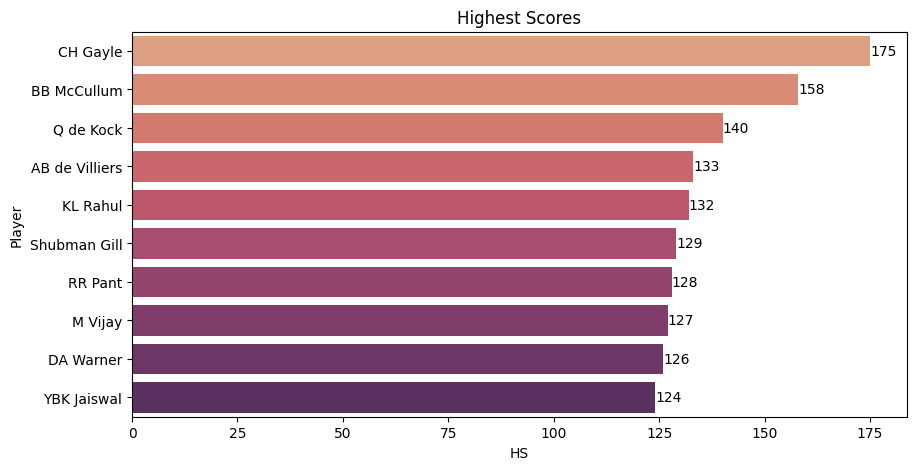

In [66]:
plt.figure(figsize=(10, 5))
plt.title("Highest Scores")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(data = df, x = top_10_scores['HS'],y=top_10_scores['Player'],palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [67]:
top_10_100s = df.sort_values(by='100s', ascending=False).reset_index()[:15]
top_10_100s.head(4)

,index,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
0,0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234,RCB
1,7,CH Gayle,2009-2021,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,KKR/KXIP/PBKS/RCB
2,20,JC Buttler,2016-2023,96,95,10,3223,124,37.91,2173,148.32,5,19,6,319,149,MI/RR
3,13,KL Rahul,2013-2023,118,109,20,4163,132,46.77,3097,134.42,4,33,4,355,168,KXIP/LSG/PBKS/RCB/SRH


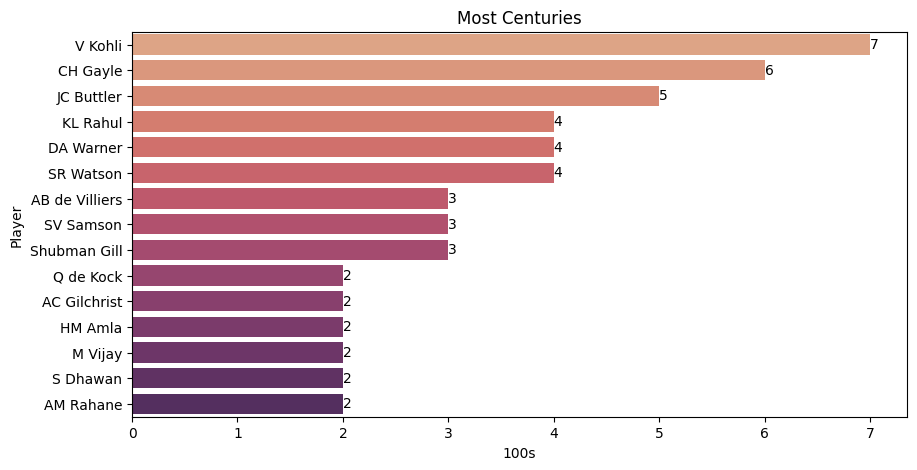

In [68]:
plt.figure(figsize=(10, 5))
plt.title("Most Centuries")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_100s['100s'], y=top_10_100s['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

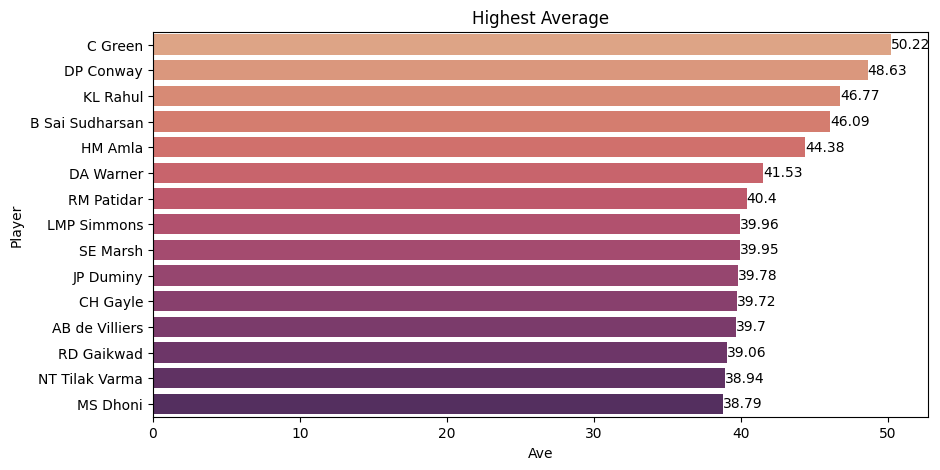

In [69]:
top_10_avg = df.sort_values(by='Ave', ascending=False).reset_index()[:15]
top_10_avg.head(4)
plt.figure(figsize=(10, 5))
plt.title("Highest Average")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_avg['Ave'], y=top_10_avg['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

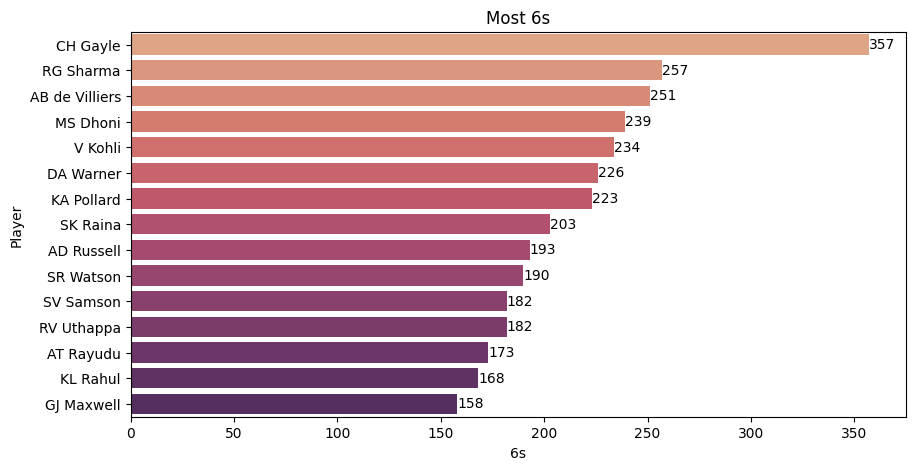

In [70]:
top_10_6s = df.sort_values(by='6s', ascending=False).reset_index()[:15]
top_10_6s.head(4)
plt.figure(figsize=(10, 5))
plt.title("Most 6s")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_6s['6s'], y=top_10_6s['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

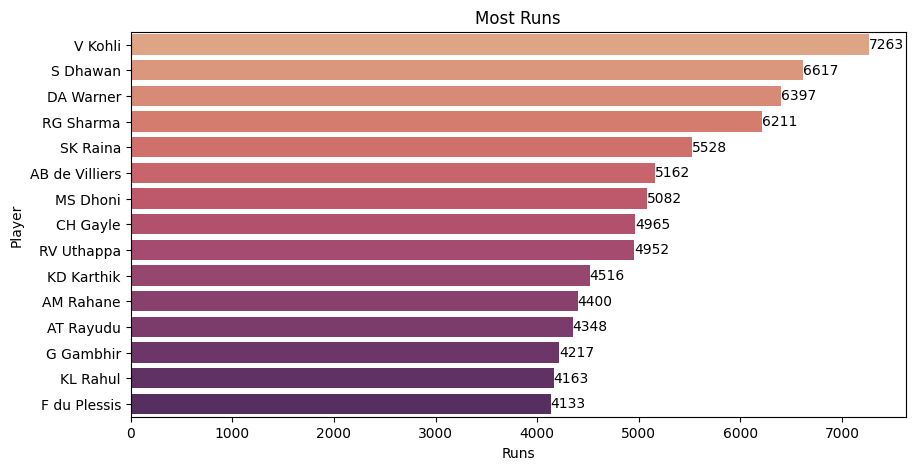

In [71]:
top_10_runs = df.sort_values(by='Runs', ascending=False).reset_index()[:15]
top_10_runs.head(4)
plt.figure(figsize=(10, 5))
plt.title("Most Runs")
ax = sns.barplot(
    data=df, x=top_10_runs['Runs'], y=top_10_runs['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

<Axes: ylabel='NO'>

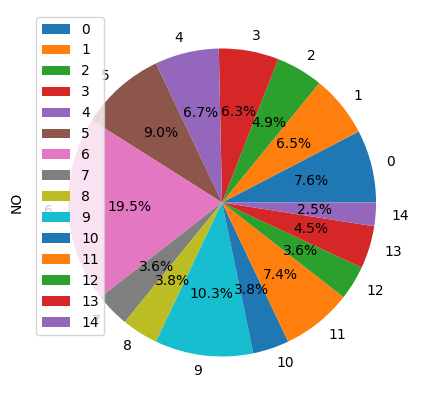

In [72]:
# What percent of top runscorers remain Not-Out most number of times.
top_10_runs.plot.pie(y='NO', figsize=(7,5),autopct='%1.1f%%')

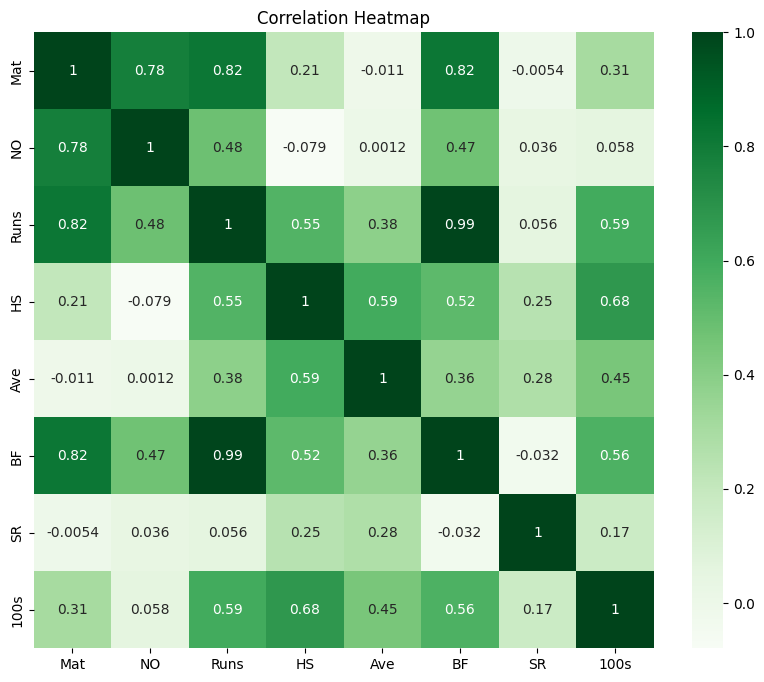

In [73]:
# cols = ['Mat', 'Inns', 'NO', 'Runs',
#         'HS', 'Ave', 'BF', 'SR', '100s', '50s', '0', '4s', '6s']

pairs = df[['Mat', 'NO', 'Runs',
            'HS', 'Ave', 'BF', 'SR', '100s']]
corr = pairs.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='Greens')
ax.set_title("Correlation Heatmap")
plt.show()

#sns.heatmap(data=)

In [74]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s,0,4s,6s,Team Name
0,V Kohli,2008-2023,237,229,34,7263,113,37.24,5586,130.02,7,50,10,643,234,RCB
1,S Dhawan,2008-2023,217,216,29,6617,106,35.38,5203,127.17,2,50,11,750,148,DC/MI/PBKS/SRH
2,DA Warner,2009-2023,176,176,22,6397,126,41.53,4572,139.91,4,61,11,646,226,DC/SRH
3,RG Sharma,2008-2023,243,238,28,6211,109,29.57,4776,130.04,1,42,16,554,257,DC/MI
4,SK Raina,2008-2021,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,CSK/GL


In [75]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge


In [76]:

# Load the data (assuming you have a CSV file with your batsmen stats)
data = df
# Define features and target variable
features = ['Mat', 'NO', 'Runs', 'BF',
            'SR', 'HS', '100s', '50s']
target = 'Ave'  # Predicting the batting average

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42)


In [77]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 14.257849935077301


In [78]:

# # For Lasso (L1 regularization)
# lasso_model = Lasso(alpha=0.9002)
# lasso_model.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred_lasso = lasso_model.predict(X_test)

# # Evaluate the Lasso regression model
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')


In [79]:

# For Lasso (L1 regularization)
lasso_model = Lasso(alpha=0.8000002)
lasso_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')


Lasso Regression - Mean Squared Error: 13.892633159255467


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.725e+02, tolerance: 7.398e-01
  model = cd_fast.enet_coordinate_descent(


In [80]:
# alpha_values = np.linspace(0.01, 1.0, 100)  # Adjust the range as needed

# # Initialize lists to store alpha values and corresponding MSE
# alphas = []
# mse_values = []
# for alpha in alpha_values:
#     # Initialize and train the Lasso regression model with current alpha
#     lasso_model = Lasso(alpha=alpha)
#     lasso_model.fit(X_train, y_train)

#     # Make predictions on the validation set
#     y_pred = lasso_model.predict(X_train)

#     # Calculate the Mean Squared Error (MSE)
#     mse = mean_squared_error(y_train, y_pred)

#     # Store the alpha value and corresponding MSE
#     alphas.append(alpha)
#     mse_values.append(mse)

# # Plotting the alpha values vs. MSE
# plt.figure(figsize=(10, 6))
# plt.plot(alphas, mse_values, marker='o')
# plt.xlabel('Alpha')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Lasso Regression: MSE vs. Alpha')
# plt.grid(True)
# plt.show()

In [81]:

# Initialize and train the Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')


Ridge Regression - Mean Squared Error: 14.25308146350391


In [82]:

# Calculate the variance of the predictions
variance_linear = np.var(y_pred)
variance_lasso = np.var(y_pred_lasso)
variance_ridge = np.var(y_pred_ridge)
print(f'Variance of Linear Regression Predictions: {variance_linear}')
print(f'Variance of Lasso Regression Predictions: {variance_lasso}')
print(f'Variance of Ridge Regression Predictions: {variance_ridge}')

# Example prediction
# features = ['Mat', 'NO', 'Runs', 'BF','SR', 'HS', '100s', '50s']
new_data = pd.DataFrame(
    [[60, 12, 1854, 2512, 101.23, 67, 0, 3]], columns=features)
prediction = lasso_model.predict(new_data)
print(f'Predicted Average: {prediction[0]}')

Variance of Linear Regression Predictions: 13.471475478772067
Variance of Lasso Regression Predictions: 11.99979807462467
Variance of Ridge Regression Predictions: 13.465986195257615
Predicted Average: 36.86364044791411


In [83]:
import joblib
joblib.dump(lasso_model,'linear_regression_average_predictor.pkl')

['linear_regression_average_predictor.pkl']

In [84]:

# Load the saved model
loaded_model = joblib.load('linear_regression_average_predictor1.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
predictions

array([33.90039834, 29.9760626 , 26.45061391, 22.61526989, 34.45960566,
       27.99091531, 29.94954287, 30.13312754, 30.24041577, 25.04126672,
       24.6838375 , 33.47889287, 27.16359802, 24.14800014, 30.08581876,
       27.57767084, 21.60086925, 25.72050263, 27.85082551, 32.43653293,
       23.25666944, 27.4457995 , 25.19786249, 24.51324145, 24.01562297,
       23.9501361 , 27.45032445, 31.87477166, 24.2527791 , 28.91334546])